In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamagarwal29/cow-lumpy-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\PC0\.cache\kagglehub\datasets\shivamagarwal29\cow-lumpy-disease-dataset\versions\1


In [ ]:
import os
from pathlib import Path

dataset_path = Path(path)  # path returned by kagglehub
print("Dataset root:", dataset_path)
print("\nDirectory structure:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(str(dataset_path), '').count(os.sep)
        indent = ' ' * 2 * level
            print(f"{indent}{os.path.basename(root)}/ ({len(files)} files)")

Dataset root: C:\Users\PC0\.cache\kagglehub\datasets\shivamagarwal29\cow-lumpy-disease-dataset\versions\1

Directory structure:
1/ (0 files)
  healthycows/ (515 files)
  lumpycows/ (421 files)


In [4]:
from collections import defaultdict

class_counts = defaultdict(int)

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith((".jpg", ".png", ".jpeg")):
            class_name = os.path.basename(root)
            class_counts[class_name] += 1

class_counts


defaultdict(int, {'healthycows': 515, 'lumpycows': 421})

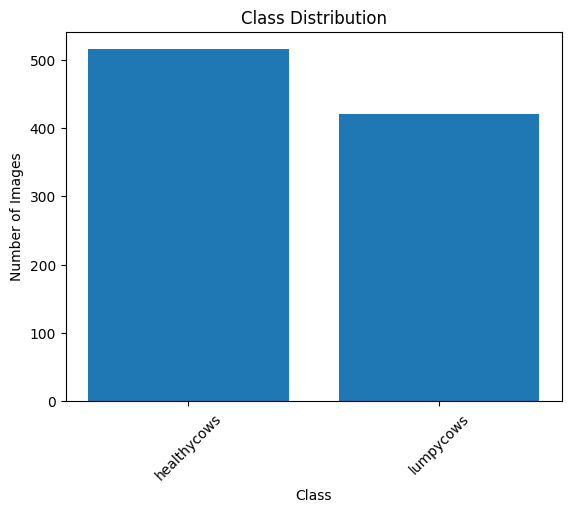

In [5]:
import matplotlib.pyplot as plt

labels = list(class_counts.keys())
values = list(class_counts.values())

plt.bar(labels, values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from PIL import Image
import numpy as np

image_sizes = []

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(root, file)
            img = Image.open(img_path)
            image_sizes.append(img.size)  # (width, height)

# Convert to numpy
image_sizes = np.array(image_sizes)

print("Average size:", image_sizes.mean(axis=0))
print("Min size:", image_sizes.min(axis=0))
print("Max size:", image_sizes.max(axis=0))



Average size: [275.28846154 184.78952991]
Min size: [153 144]
Max size: [350 259]


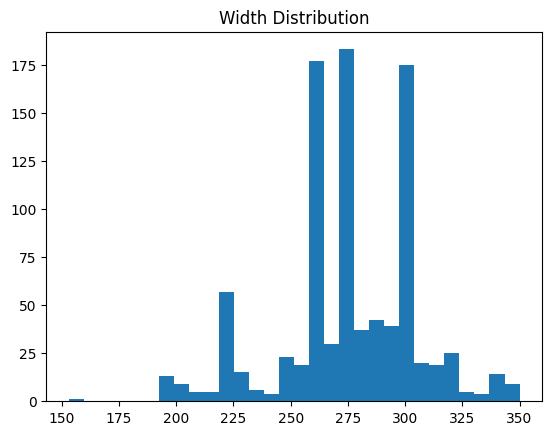

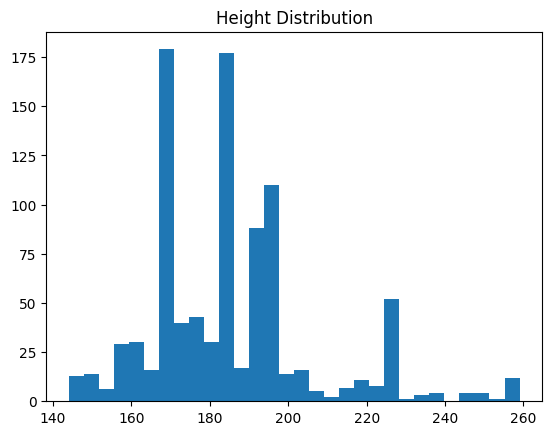

In [7]:
plt.hist(image_sizes[:,0], bins=30)
plt.title("Width Distribution")
plt.show()

plt.hist(image_sizes[:,1], bins=30)
plt.title("Height Distribution")
plt.show()


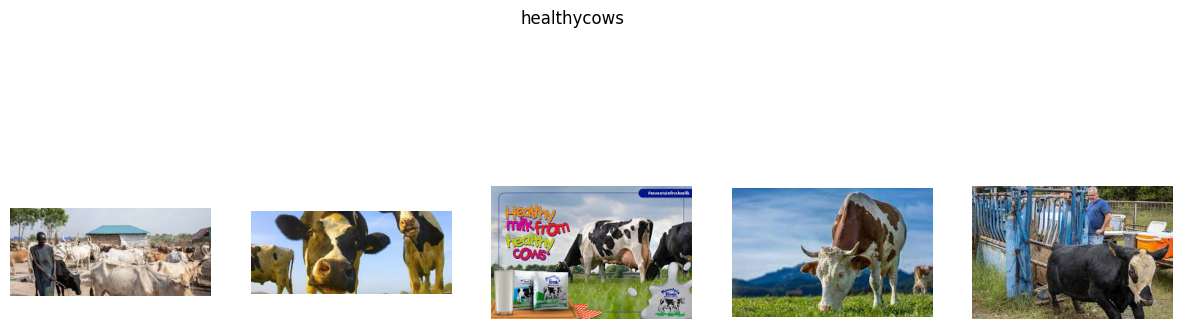

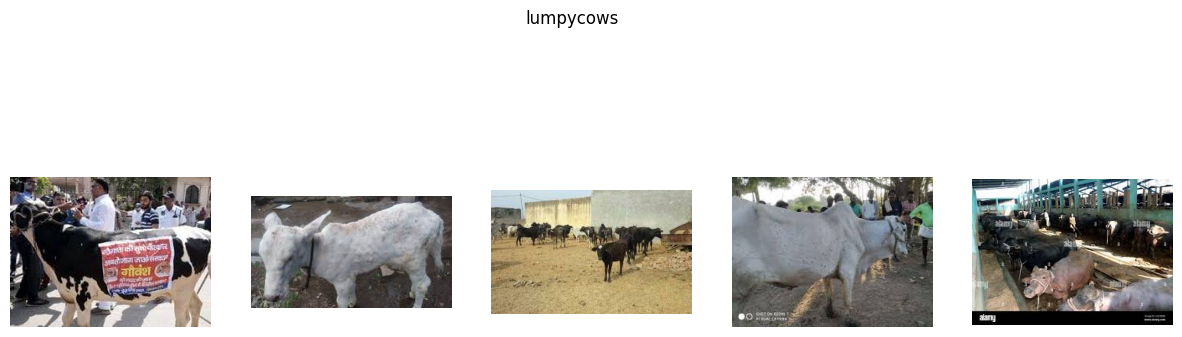

In [8]:
import random
import matplotlib.pyplot as plt

def show_samples(class_name, num_samples=5):
    class_path = os.path.join(path, class_name)
    images = os.listdir(class_path)
    samples = random.sample(images, num_samples)
    
    plt.figure(figsize=(15,5))
    for i, img_name in enumerate(samples):
        img = Image.open(os.path.join(class_path, img_name))
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(class_name)
    plt.show()

# Example:
for class_name in class_counts.keys():
    show_samples(class_name)


In [9]:
import hashlib

hashes = {}
duplicates = []

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith((".jpg",".png",".jpeg")):
            img_path = os.path.join(root, file)
            with open(img_path, "rb") as f:
                filehash = hashlib.md5(f.read()).hexdigest()
            
            if filehash in hashes:
                duplicates.append(img_path)
            else:
                hashes[filehash] = img_path

print("Duplicate images found:", len(duplicates))


Duplicate images found: 1


In [65]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os


In [66]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


In [67]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [68]:
import os 
print(os.listdir(path))

['healthycows', 'lumpycows']


In [69]:
healthy_path = os.path.join(path, "healthycows")

In [70]:
X_train = []
y_train = []
image_size = 150

healthy_path = os.path.join(path, "healthycows")
for j in os.listdir(healthy_path):
    img = cv2.imread(os.path.join(healthy_path,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(0)
lumpy_path = os.path.join(path, "lumpycows")
for j in os.listdir(lumpy_path):
    img = cv2.imread(os.path.join(lumpy_path,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)

In [71]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(936, 150, 150, 3)

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [73]:
y_train.shape

(842,)

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet18
model = models.resnet18(weights="IMAGENET1K_V1")



In [75]:
num_classes = 2
model.fc = nn.Linear(model.fc.in_features, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [76]:
model=model.to(device)

In [77]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    )
])


In [82]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# ========================================
# STEP 1: Load dataset correctly
# ========================================
dataset_root = r"C:\Users\PC0\.cache\kagglehub\datasets\shivamagarwal29\cow-lumpy-disease-dataset\versions\1"  # Use your actual path

X = []
y = []
image_size = 150

# Healthy cows (class 0)
healthy_path = os.path.join(dataset_root, "healthycows")
for img_name in os.listdir(healthy_path):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(os.path.join(healthy_path, img_name))
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(0)

# Lumpy cows (class 1)
lumpy_path = os.path.join(dataset_root, "lumpycows")
for img_name in os.listdir(lumpy_path):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(os.path.join(lumpy_path, img_name))
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(1)

# Convert to numpy arrays + normalize
X = np.array(X, dtype=np.float32) / 255.0  # Shape: (936, 150, 150, 3)
y = np.array(y, dtype=np.int64)            # Shape: (936,)

print(f"✅ Loaded {len(X)} images | X shape: {X.shape} | y shape: {y.shape}")

# ========================================
# STEP 2: Split with matching shapes
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,          # 10% test → 94 images
    random_state=101,
    stratify=y              # Preserve class ratio
)

print(f"\n✅ After split:")
print(f"   X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"   X_test:  {X_test.shape}  | y_test:  {y_test.shape}")

# ========================================
# STEP 3: Convert to PyTorch tensors (CRITICAL: fix channel order!)
# ========================================
# OpenCV format: (N, H, W, C) → PyTorch format: (N, C, H, W)
X_train_tensor = torch.tensor(X_train.transpose(0, 3, 1, 2), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.transpose(0, 3, 1, 2), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print(f"\n✅ Tensor shapes:")
print(f"   X_train_tensor: {X_train_tensor.shape} | y_train_tensor: {y_train_tensor.shape}")
print(f"   X_test_tensor:  {X_test_tensor.shape}  | y_test_tensor:  {y_test_tensor.shape}")

# ========================================
# STEP 4: Create DataLoaders
# ========================================
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"\n✅ DataLoaders created:")
print(f"   Train batches: {len(train_loader)} ({len(train_dataset)} samples)")
print(f"   Test batches:  {len(test_loader)} ({len(test_dataset)} samples)")

# ========================================
# STEP 5: Verify with a sample batch
# ========================================
for images, labels in train_loader:
    print(f"\n✅ Sample batch:")
    print(f"   Images shape: {images.shape}")   # Should be [32, 3, 150, 150]
    print(f"   Labels shape: {labels.shape}")   # Should be [32]
    print(f"   Labels: {labels[:5]}")           # First 5 labels
    break


✅ Loaded 936 images | X shape: (936, 150, 150, 3) | y shape: (936,)

✅ After split:
   X_train: (842, 150, 150, 3) | y_train: (842,)
   X_test:  (94, 150, 150, 3)  | y_test:  (94,)

✅ Tensor shapes:
   X_train_tensor: torch.Size([842, 3, 150, 150]) | y_train_tensor: torch.Size([842])
   X_test_tensor:  torch.Size([94, 3, 150, 150])  | y_test_tensor:  torch.Size([94])

✅ DataLoaders created:
   Train batches: 27 (842 samples)
   Test batches:  3 (94 samples)

✅ Sample batch:
   Images shape: torch.Size([32, 3, 150, 150])
   Labels shape: torch.Size([32])
   Labels: tensor([1, 1, 1, 1, 1])


In [83]:
model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 2)  # 2 classes
model = model.to(device)


In [84]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")



Epoch [1/100], Loss: 0.6741
Epoch [2/100], Loss: 0.6757
Epoch [3/100], Loss: 0.6751
Epoch [4/100], Loss: 0.6858
Epoch [5/100], Loss: 0.6787
Epoch [6/100], Loss: 0.6743
Epoch [7/100], Loss: 0.6738
Epoch [8/100], Loss: 0.6692
Epoch [9/100], Loss: 0.6742
Epoch [10/100], Loss: 0.6751
Epoch [11/100], Loss: 0.6717
Epoch [12/100], Loss: 0.6787
Epoch [13/100], Loss: 0.6720
Epoch [14/100], Loss: 0.6746
Epoch [15/100], Loss: 0.6779
Epoch [16/100], Loss: 0.6720
Epoch [17/100], Loss: 0.6763
Epoch [18/100], Loss: 0.6750
Epoch [19/100], Loss: 0.6795
Epoch [20/100], Loss: 0.6847
Epoch [21/100], Loss: 0.6665
Epoch [22/100], Loss: 0.6777
Epoch [23/100], Loss: 0.6808
Epoch [24/100], Loss: 0.6808
Epoch [25/100], Loss: 0.6731
Epoch [26/100], Loss: 0.6809
Epoch [27/100], Loss: 0.6828
Epoch [28/100], Loss: 0.6785
Epoch [29/100], Loss: 0.6706
Epoch [30/100], Loss: 0.6724
Epoch [31/100], Loss: 0.6658
Epoch [32/100], Loss: 0.6800
Epoch [33/100], Loss: 0.6778
Epoch [34/100], Loss: 0.6807
Epoch [35/100], Loss: 0

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [87]:
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Test Accuracy: 0.6596
F1-score: 0.6735
Precision: 0.5893
Recall: 0.7857


### augmentation

In [88]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class CowDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx]
        label = self.y[idx]

        # Convert numpy -> PIL (required for torchvision transforms)
        image = Image.fromarray((image * 255).astype(np.uint8))

        if self.transform:
            image = self.transform(image)

        return image, label


In [89]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(150, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor()
])


In [90]:
train_dataset = CowDataset(X_train, y_train, transform=train_transform)
test_dataset  = CowDataset(X_test, y_test, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [97]:
num_epochs = 100
for epoch in range(num_epochs):
    model= model.to(device)

    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")



Epoch [1/100], Loss: 0.6952
Epoch [2/100], Loss: 0.7002
Epoch [3/100], Loss: 0.6885
Epoch [4/100], Loss: 0.7061
Epoch [5/100], Loss: 0.6919
Epoch [6/100], Loss: 0.6909
Epoch [7/100], Loss: 0.7032
Epoch [8/100], Loss: 0.6900
Epoch [9/100], Loss: 0.6915
Epoch [10/100], Loss: 0.6897
Epoch [11/100], Loss: 0.6885
Epoch [12/100], Loss: 0.6941
Epoch [13/100], Loss: 0.6811
Epoch [14/100], Loss: 0.6941
Epoch [15/100], Loss: 0.6884
Epoch [16/100], Loss: 0.7036
Epoch [17/100], Loss: 0.6852
Epoch [18/100], Loss: 0.6881
Epoch [19/100], Loss: 0.6959
Epoch [20/100], Loss: 0.6943
Epoch [21/100], Loss: 0.6943
Epoch [22/100], Loss: 0.6805
Epoch [23/100], Loss: 0.6967
Epoch [24/100], Loss: 0.6892
Epoch [25/100], Loss: 0.6975
Epoch [26/100], Loss: 0.6917
Epoch [27/100], Loss: 0.7045
Epoch [28/100], Loss: 0.6934
Epoch [29/100], Loss: 0.7039
Epoch [30/100], Loss: 0.6836
Epoch [31/100], Loss: 0.6927
Epoch [32/100], Loss: 0.7032
Epoch [33/100], Loss: 0.6865
Epoch [34/100], Loss: 0.6877
Epoch [35/100], Loss: 0

In [93]:
print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

Train dataset size: 842
Test dataset size: 94


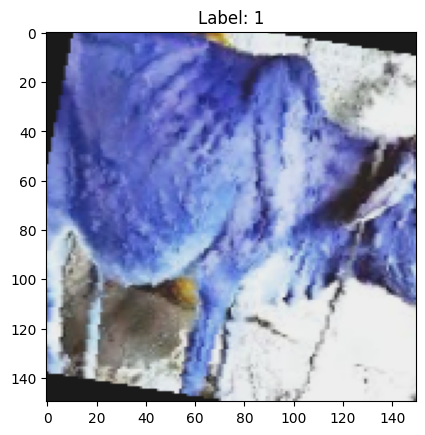

In [94]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))

plt.imshow(images[0].permute(1,2,0))
plt.title(f"Label: {labels[0]}")
plt.show()


In [95]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [96]:
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Test Accuracy: 0.5745
F1-score: 0.6078
Precision: 0.5167
Recall: 0.7381
